<a href="https://colab.research.google.com/github/TracyT20/Programming-languages-data-analysis/blob/main/programming_languages_data_analysis_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("QueryResults.csv")
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [6]:
new_df = df.rename(columns={'m': 'DATE', 'TagName': 'TAG','Unnamed: 2': 'POSTS'})
new_df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [7]:
new_df.shape

(1991, 3)

In [8]:
grouped_df=new_df.groupby('TAG').sum().sort_values('POSTS', ascending=False)
print(grouped_df)

                                                         DATE    POSTS
TAG                                                                   
javascript  2008-08-01 00:00:002008-09-01 00:00:002008-10-...  2056510
java        2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1696403
python      2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1496210
c#          2008-07-01 00:00:002008-08-01 00:00:002008-09-...  1423530
php         2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1361988
c++         2008-08-01 00:00:002008-09-01 00:00:002008-10-...   684210
r           2008-09-01 00:00:002008-11-01 00:00:002008-12-...   356799
c           2008-08-01 00:00:002008-09-01 00:00:002008-10-...   336042
swift       2009-01-01 00:00:002009-02-01 00:00:002009-03-...   273055
ruby        2008-08-01 00:00:002008-09-01 00:00:002008-10-...   214582
perl        2008-08-01 00:00:002008-09-01 00:00:002008-10-...    65286
go          2009-11-01 00:00:002009-12-01 00:00:002010-01-...    47499
delphi

In [9]:
new_df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [10]:
new_df.DATE=pd.to_datetime(new_df.DATE)
print(new_df)

           DATE         TAG  POSTS
0    2008-07-01          c#      3
1    2008-08-01    assembly      8
2    2008-08-01  javascript    162
3    2008-08-01           c     85
4    2008-08-01      python    124
...         ...         ...    ...
1986 2020-07-01           r   5694
1987 2020-07-01          go    743
1988 2020-07-01        ruby    775
1989 2020-07-01        perl    182
1990 2020-07-01       swift   3607

[1991 rows x 3 columns]


In [12]:
reshaped_df=pd.pivot(new_df, index='DATE', columns='TAG', values='POSTS')
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [13]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()
reshaped_df.isna()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-08-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-09-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-10-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-11-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-04-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-05-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False


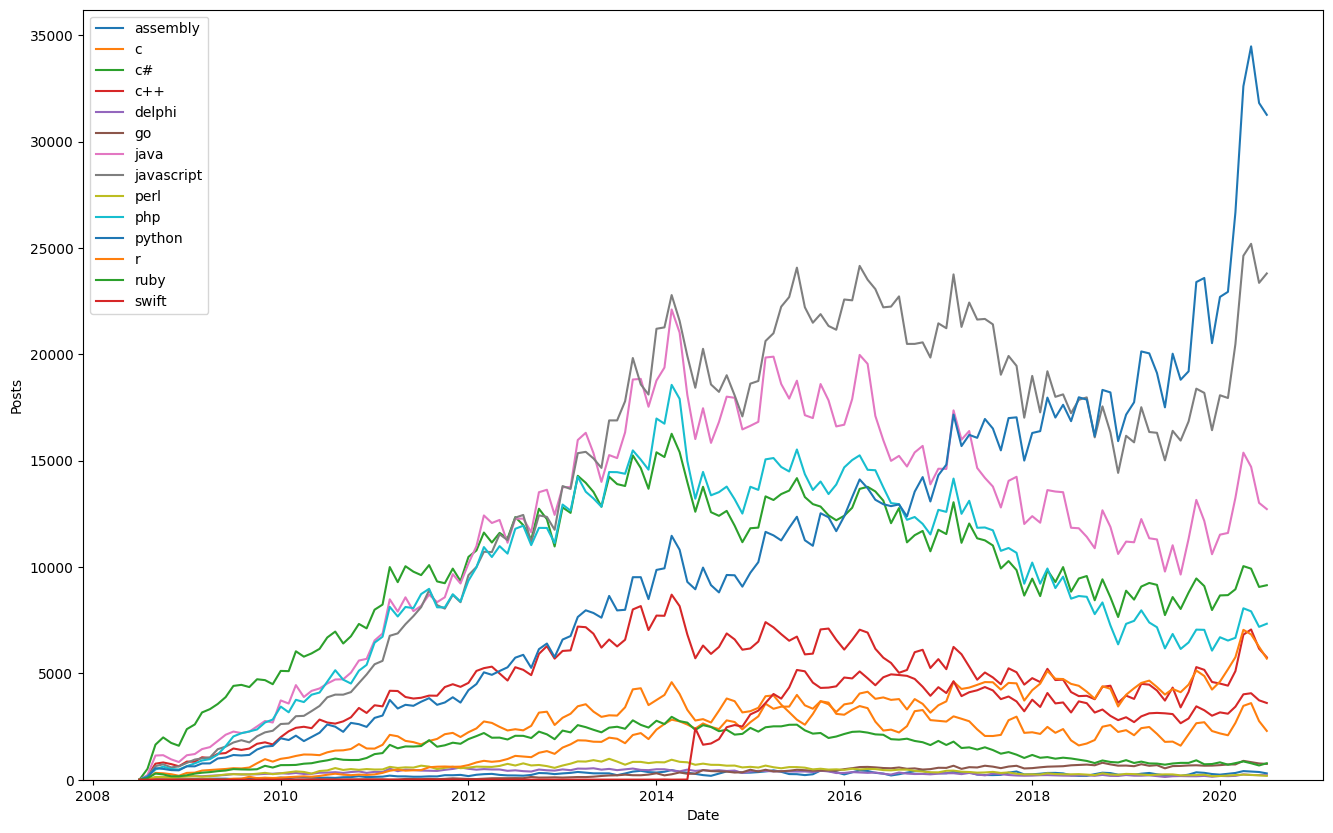

In [19]:
plt.figure(figsize=(16,10))
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=column) # Plot each tag's data
plt.xlabel('Date')
plt.ylabel('Posts')
plt.legend()
plt.ylim(0)
plt.show()

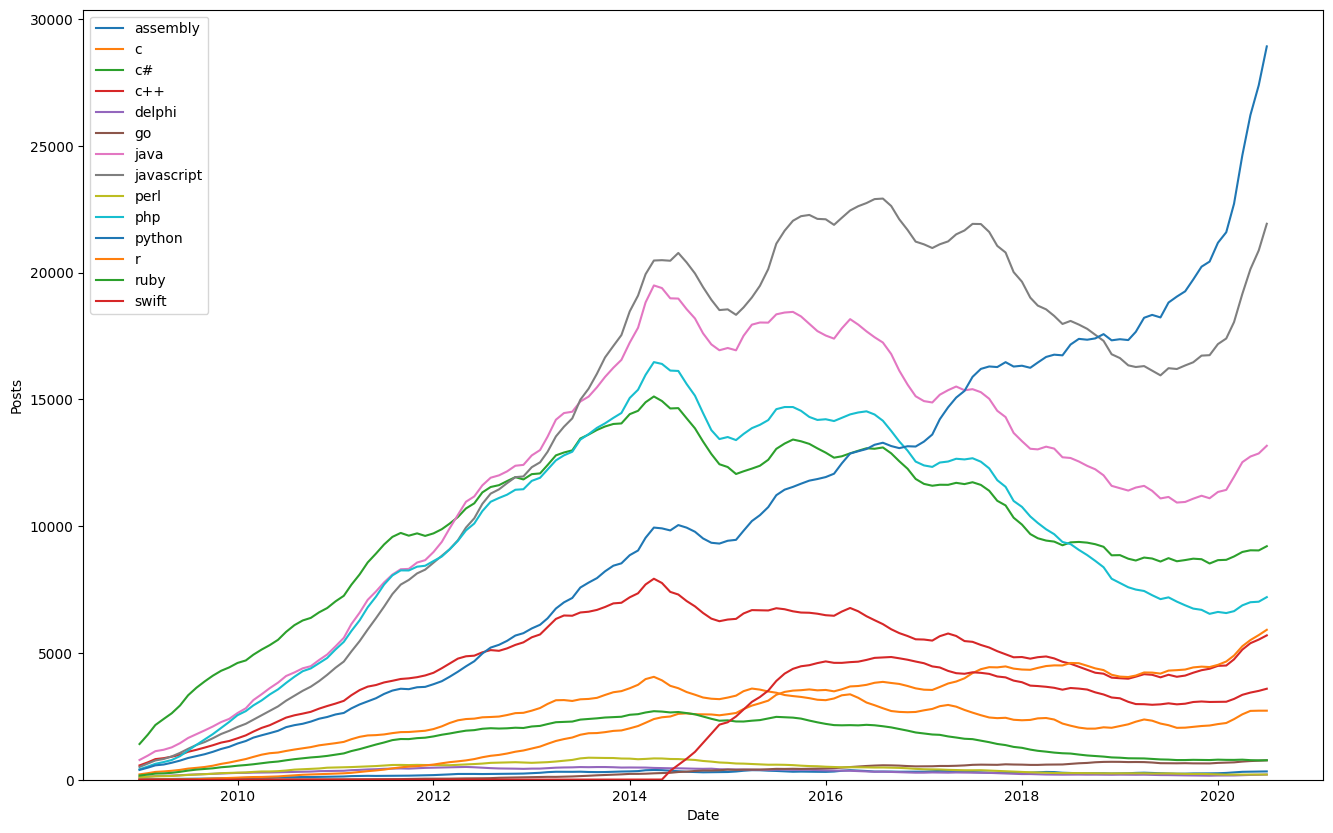

In [21]:
smoothed_df=reshaped_df.rolling(window=7).mean()
plt.figure(figsize=(16,10))
for column in smoothed_df.columns:
    plt.plot(smoothed_df.index, smoothed_df[column], label=column) # Plot each tag's data
plt.xlabel('Date')
plt.ylabel('Posts')
plt.legend()
plt.ylim(0)
plt.show()